<a href="https://colab.research.google.com/github/yebiFesseha/Excel-for-Excel-in-tensorflow/blob/main/Keras_LinearRegression_insurananceData_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insurance premium prediction using Linear Regression with Keras.
* Dataset location: # https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.style.use('dark_background')
import os

In [2]:
df = pd.read_csv(r'/content/sample_data/insurance.csv')
df.sample(2)

,age,sex,bmi,children,smoker,region,expenses
597,34,female,33.3,1,no,northeast,5594.85
551,32,female,28.9,0,no,southeast,3972.92


### Exploratory Data Analysis (EDA)

In [3]:
#check data types of fields
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
print(df.select_dtypes(include=np.number).columns)
df.select_dtypes(include='object').columns
df.select_dtypes(exclude=np.number).columns

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')


Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
#check fot null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

<Figure size 2200x600 with 0 Axes>

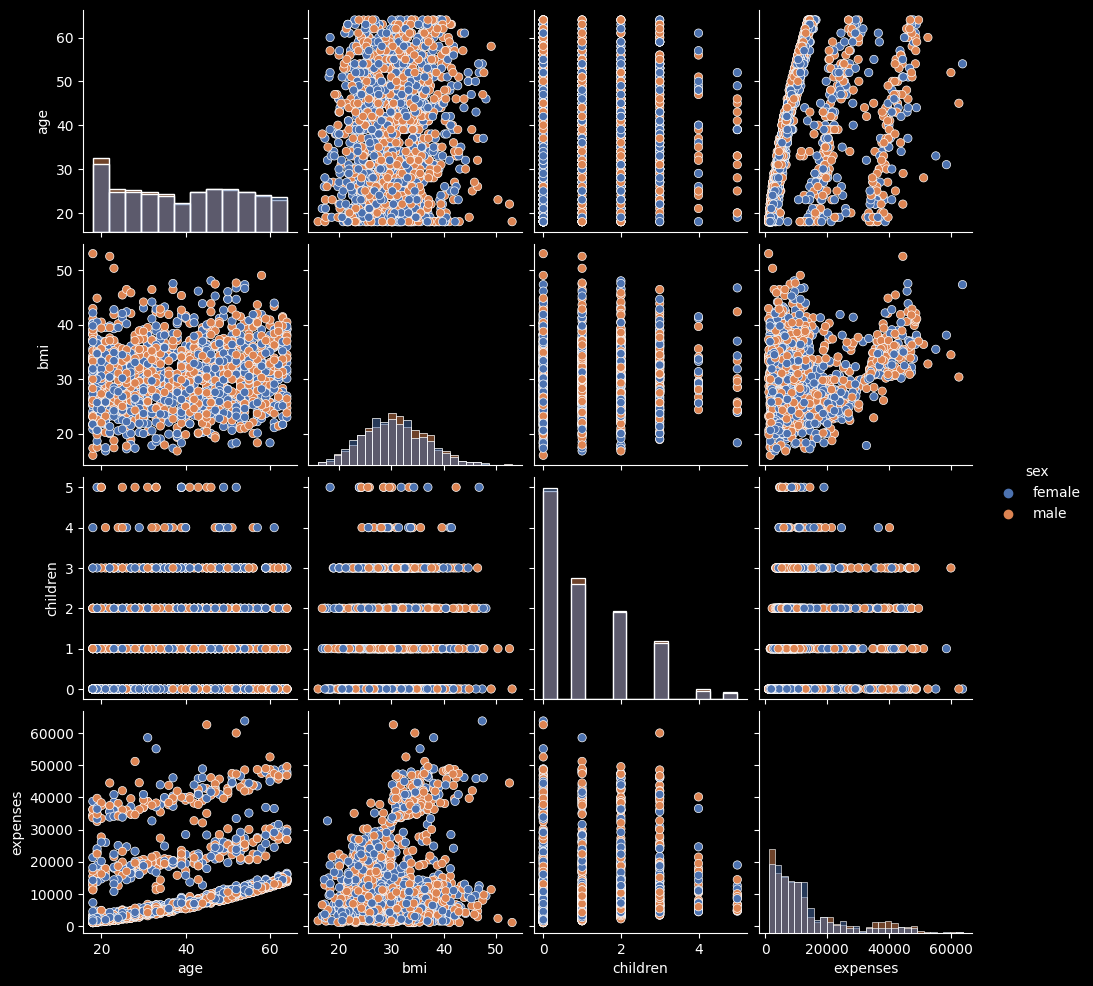

In [5]:
#check for distribution of values per field duplicated df[['age', 'bmi', 'children', 'expenses']]
plt.figure(figsize=(22,6))
custom_palette = {'male':'blue', 'female':'pink'}
sns.pairplot(df,
             kind='scatter',
             diag_kind='hist',
             hue='sex',
             palette='deep',
             plot_kws={'alpha':1}
)
plt.show()

In [6]:
#check for duplicates, and show all duplicated records using keep=False. Keep=True is the default, that shows only the last duplicated record
# df.loc[df.duplicated(subset='expenses')]
df.loc[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,expenses
195,19,male,30.6,0,no,northwest,1639.56
581,19,male,30.6,0,no,northwest,1639.56


In [4]:
#drop duplicated record and re-index using ignore_index=True
print(df.shape)
df.drop_duplicates(ignore_inbdex=True, inplace=True)
df.shape

(1338, 7)


(1337, 7)

### Correlation Plot to determine features per label relationship

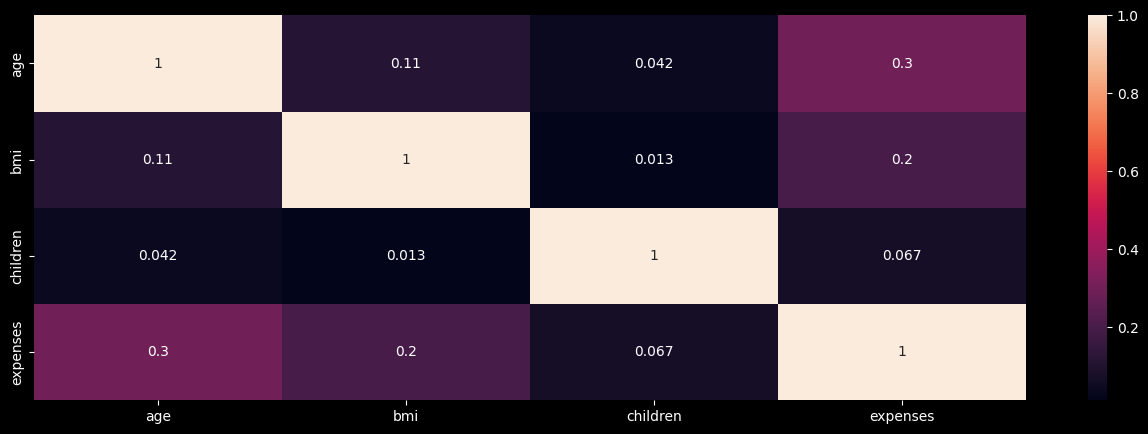

In [14]:
plt.figure(figsize=(16,5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, )
plt.show()

* the heatmap shows that age has the highest abolute correlation value with expenses, hence age a better predictive feature than the rest.

### Predict the premium/expenses using numerical field only

### Steps of creating a deep learning network
* define the input feature/s and the output label
* normalize/scale the data
* Instantiate a keras model/ compile the model/ fit the model/ evaluate the model/ predict using the model and compare predicted versus the real value

In [ ]:
#plot and see the normalized features
'''plt.figure(figsize=(22,4))
plt.subplot(1,3,1)
plt.title('Normalized Age')
sns.histplot(X['children'])
plt.subplot(1,3,2)
plt.title('Normalized bmi')
sns.histplot(X['bmi'])
plt.subplot(1,3,3)
plt.title('Normalized # Children')
sns.histplot(X['children'])
plt.tight_layout()
plt.show()'''

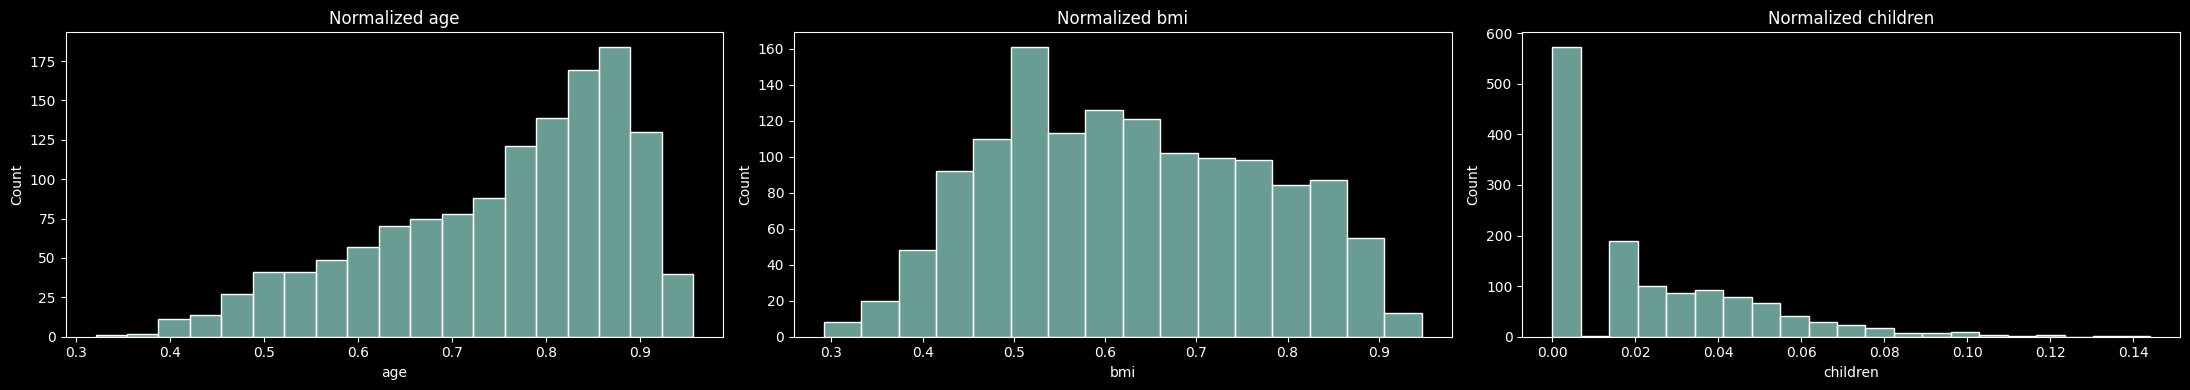

In [8]:
#define input features X and output y
X = df[['age', 'bmi', 'children']]
y = df['expenses']

#normalise or scale
'''tf.keras.layers.Normalization().adapt(np.array(X)): normalise the input using keras and this can be used
in the deep learning as part of the preprocessing pipeline'''
#In this example we use the normalize function with axis=1, i.e the scaling is done per feature
X = tf.keras.utils.normalize(X, axis=1)

#plot and see the normalized features
plt.figure(figsize=(22,4))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.title(f'Normalized {X.columns[i]}')
  sns.histplot(X.iloc[:,i])
plt.tight_layout()
plt.show()


In [ ]:
#scaleing the label/target is not necessary but during loss calculation it puts the values in smaller scale to read
y = np.round(y/1000,2)

In [132]:
#split the data without train_test_split using pandas sample, frac and index
np.random.seed(42)
X_train = X.sample(frac=0.75)
X_test = X.drop(X_train.index)
y_train = y[X_train.index]
y_test = y[X_test.index]

### Create keras model

In [10]:
#instantiate the model with 3 input features
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(3,))) # define the input layer
#define the hidden layers
model.add(tf.keras.layers.Dense(32, tf.keras.activations.swish))
model.add(tf.keras.layers.Dense(32, tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(32, tf.keras.activations.relu))

model.add(tf.keras.layers.Dense(1, tf.keras.activations.swish)) #define the output layer

#compile the model: hence check for error, optimise and run an accuracy metrics
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=tf.keras.metrics.mse
)

history = model.fit(np.array(X_train), y_train, epochs=200, verbose=0, validation_data=(X_test, y_test))
# history = model.fit(np.array(X_train), y_train, epochs=200, verbose=0)

In [11]:
df = pd.DataFrame(history.history)
df['epochs'] = history.epoch
df.sample(2)

,loss,mean_squared_error,val_loss,val_mean_squared_error,epochs
66,7397.933594,175889744.0,7060.532715,164853152.0,66
74,7403.360840,175895200.0,7049.043457,161688624.0,74


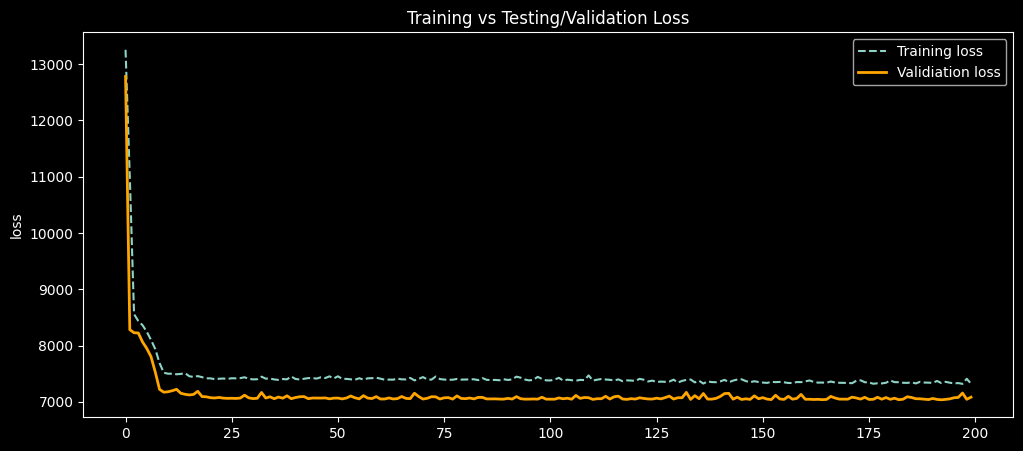

In [12]:
df = pd.DataFrame(history.history)
df['epochs'] = history.epoch
plt.figure(figsize=(12,5))
plt.title('Training vs Testing/Validation Loss')
sns.lineplot(df['loss'], label='Training loss', linestyle='--')
sns.lineplot(df['val_loss'], label = 'Validiation loss', color='orange', linewidth=2)

plt.show()

The above plot shows that the validation loss is better than the training loss, that suggests the model is performing well, not overfitting or underfitting.

<Axes: ylabel='expenses'>

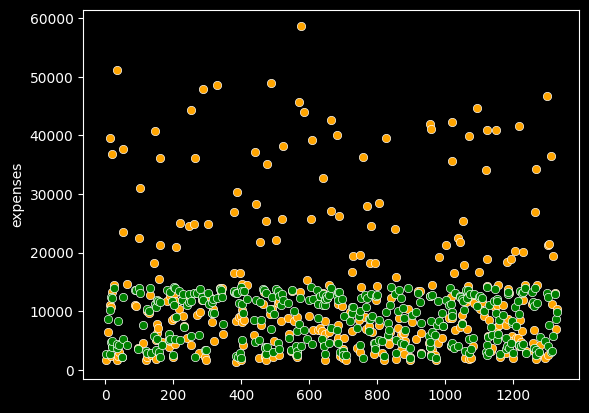

In [13]:
y_pred = model.predict(X_test, verbose=0).reshape(-1,)
sns.scatterplot(y=y_test, x=X_test.index, color='orange')
sns.scatterplot(y=y_pred, x=X_test.index, color='green')

# Keras ANN prediction Using One input feature = "age":





In [55]:
# x is already normlaized, so we just get a single feature
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(16, tf.keras.activations.linear))
model.add(tf.keras.layers.Dense(16, tf.keras.activations.linear))
model.add(tf.keras.layers.Dense(1, tf.keras.activations.linear))

model.compile(
    loss= tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics= tf.keras.metrics.mse
   )

history = model.fit(X_train['age'], y_train, epochs = 200,
                    validation_data= (X_test['age'], y_test),verbose=0)

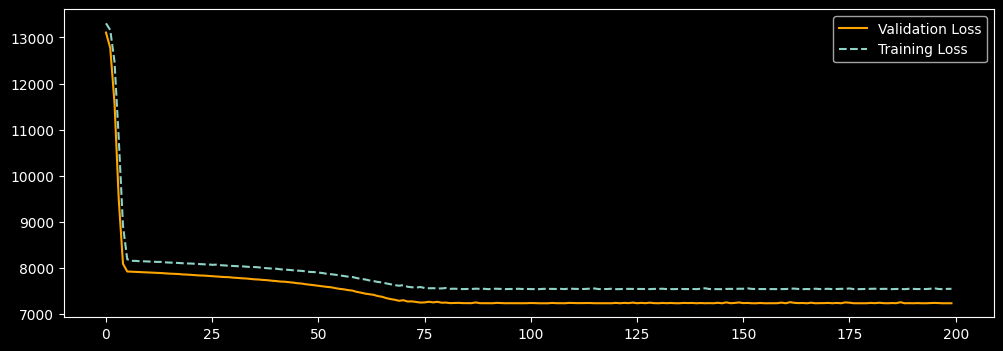

In [56]:
plt.figure(figsize=(12,4))
sns.lineplot(history.history['val_loss'], color='orange', label='Validation Loss')
sns.lineplot(history.history['loss'], linestyle='--', label='Training Loss')
plt.show()

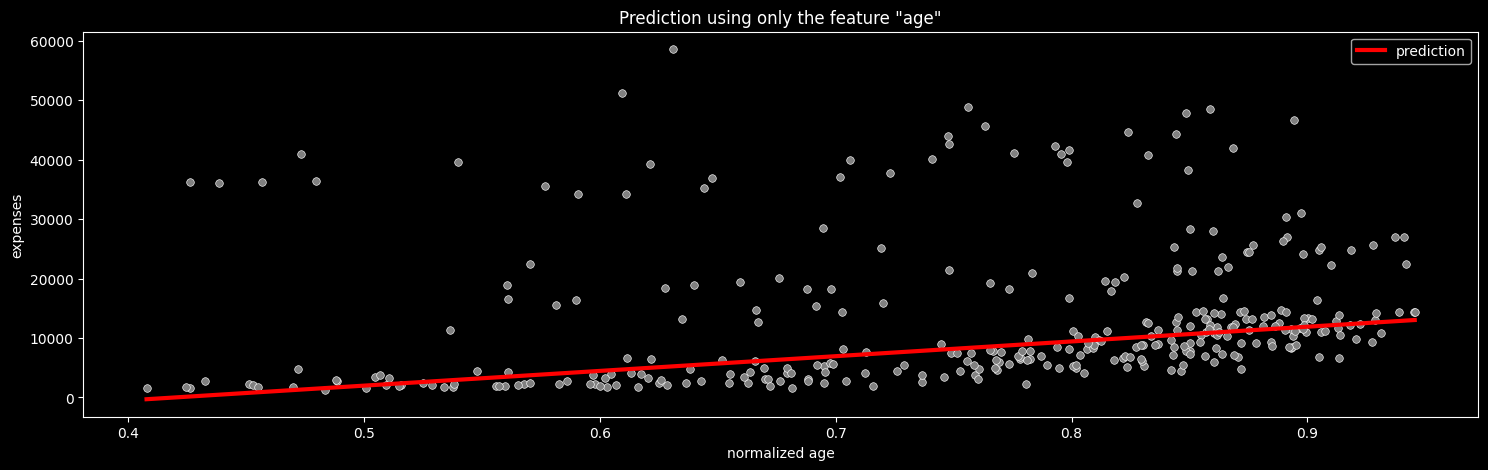

In [89]:
#predict and plot
y_pred = model.predict(X_test['age'], verbose=0).reshape(-1,)
plt.figure(figsize=(18,5))
plt.title('Prediction using only the feature "age"')
sns.lineplot(y= y_pred, x= X_test['age'], linewidth=3, color='red', label='prediction')
sns.scatterplot(y= y_test, x=X_test['age'], s=30, alpha=1, color='grey')
plt.xlabel('normalized age')
plt.show()

In [99]:
model.evaluate(y_test, y_pred, verbose=0)

[325891008.0, 1.9391547131192934e+17]

# Keras ANN prediction Using One input feature = "bmi"



In [110]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Dense(1))

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=tf.keras.metrics.mse
)

history = model.fit(X_train['bmi'], y_train, epochs=200,
                    validation_data=(X_test['bmi'], y_test ), verbose=0)

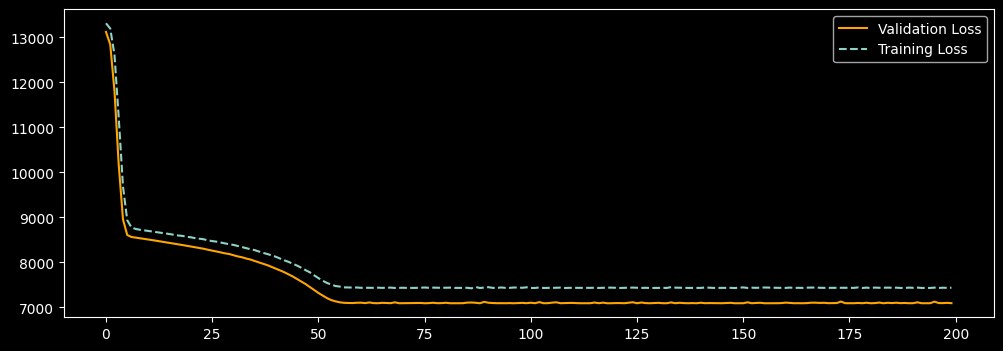

In [111]:
plt.figure(figsize=(12,4))
sns.lineplot(history.history['val_loss'], color='orange', label='Validation Loss')
sns.lineplot(history.history['loss'], linestyle='--', label='Training Loss')
plt.show()

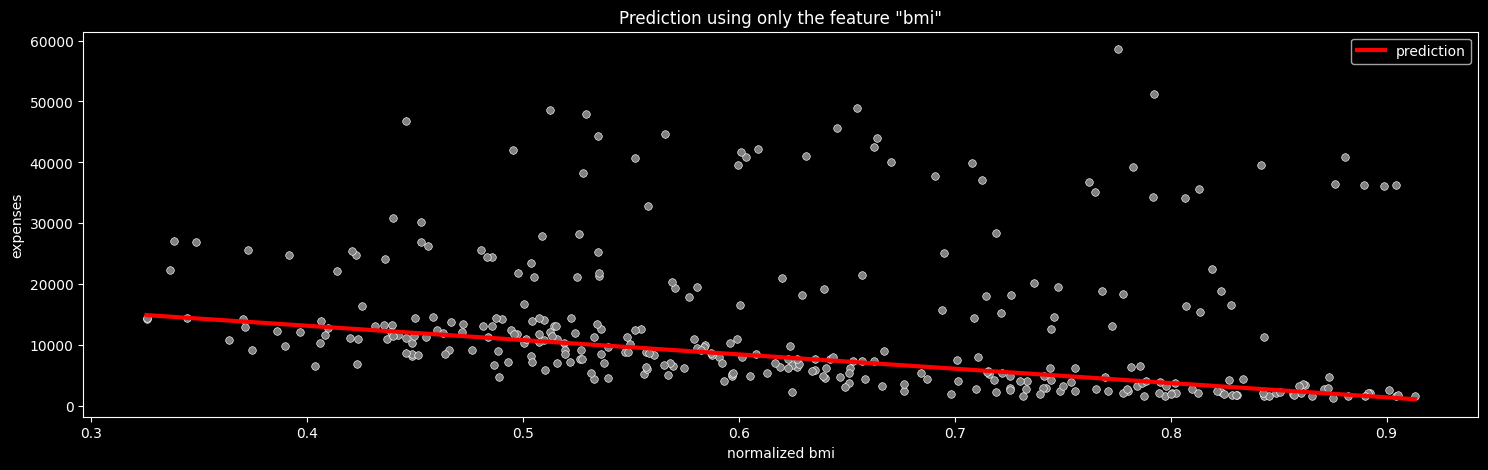

In [112]:
#predict and plot
y_pred = model.predict(X_test['bmi'], verbose=0).reshape(-1,)
plt.figure(figsize=(18,5))
plt.title('Prediction using only the feature "bmi"')
sns.lineplot(y= y_pred, x= X_test['bmi'], linewidth=3, color='red', label='prediction')
sns.scatterplot(y= y_test, x=X_test['bmi'], s=30, alpha=1, color='grey')
plt.xlabel('normalized bmi')
plt.show()

In [113]:
model.evaluate(y_test, y_pred, verbose=0)

[308965440.0, 1.7429508145125786e+17]

# Keras ANN prediction Using One input feature = "Children"



In [133]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Dense(1))

model.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics= tf.keras.metrics.mse
)

history = model.fit(X_train['children'], y_train, epochs=200,
                    validation_data=(X_test['children'], y_test), verbose=0)

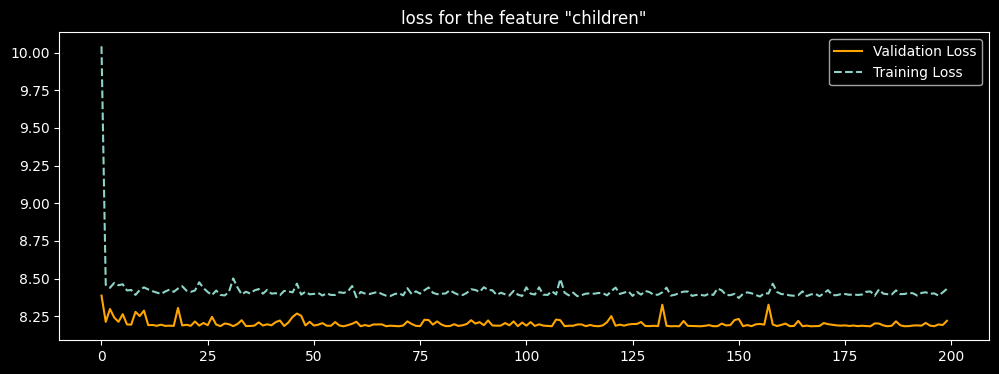

In [134]:
plt.figure(figsize=(12,4))
plt.title('loss for the feature "children"')
sns.lineplot(history.history['val_loss'], color='orange', label='Validation Loss')
sns.lineplot(history.history['loss'], linestyle='--', label='Training Loss')
plt.show()

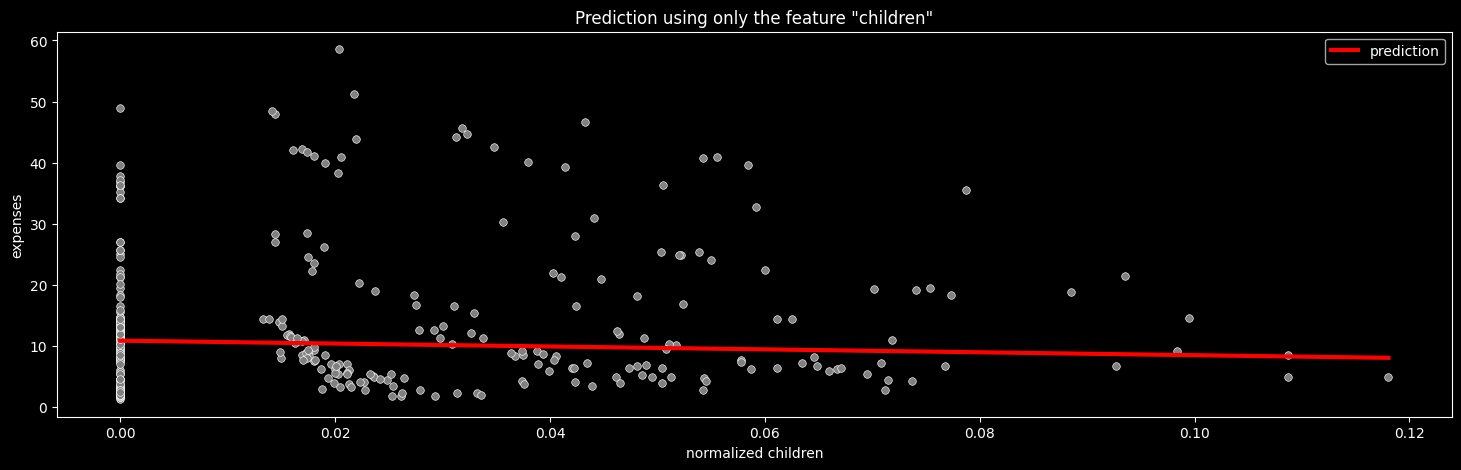

In [135]:
#predict and plot
y_pred = model.predict(X_test['children'], verbose=0).reshape(-1,)
plt.figure(figsize=(18,5))
plt.title('Prediction using only the feature "children"')
sns.lineplot(y= y_pred, x= X_test['children'], linewidth=3, color='red', label='prediction')
sns.scatterplot(y= y_test, x=X_test['children'], s=30, alpha=1, color='grey')
plt.xlabel('normalized children')
plt.show()

In [136]:
model.evaluate(y_test, y_pred, verbose=0)

[312.6419372558594, 178686.140625]